# Error-driven Payoff and Attendance

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.filterwarnings("ignore")

In [2]:
from Classes.cognitive_model_agents import AttendanceM1, AttendanceM2, AttendanceM3
from Utils.unit_tests import (
    test_bar_is_full, 
    test_bar_has_capacity,
    test_alternation
)

In [3]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
	"learning_rate": 0.2,
    "bias": 0.5,
	"inverse_temperature":16
}

In [4]:
from pathlib import Path

image_folder_all = Path('../images/Attendance')
image_folder_all.mkdir(parents=True, exist_ok=True)
image_folder_M1 = Path('../images/Attendance/M1')
image_folder_M1.mkdir(parents=True, exist_ok=True)
image_folder_M2 = Path('../images/Attendance/M2')
image_folder_M2.mkdir(parents=True, exist_ok=True)
image_folder_M3 = Path('../images/Attendance/M3')
image_folder_M3.mkdir(parents=True, exist_ok=True)

1. [M1](#m1)
2. [M2](#m2)
3. [M3](#m3)

## M1 <a class="anchor" id="m1"></a>

In [5]:
agent = AttendanceM1(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_has_capacity(agent)


------------------------------------------------------------
Test bar has capacity
------------------------------------------------------------
Initial state: [0, 0]
---------- Round 0 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 0]
Payoff action 0: 0
Average go: 0.0
Payoff: 0
G observed for action 0 in state (0, 0) is: 0.0
Learning rule:
Q[0] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[0] = 0.0
---------- Round 1 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 0]
Payoff action 0: 0
Average go: 0.0
Payoff: 0
G observed for action 0 in state [0, 0] is: 0.0
Learning rule:
Q[0] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[0] = 0.0
---------- Round 2 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Average go: 0.0
Payoff: 1
G observed for 

In [6]:
agent = AttendanceM1(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_is_full(agent)


------------------------------------------------------------
Test bar is full
------------------------------------------------------------
Initial state: [1, 1]
---------- Round 0 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 1]
Payoff action 1: -1
Average go: 1.0
Payoff: -1
G observed for action 1 in state (1, 1) is: 0.0
Learning rule:
Q[1] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[1] = 0.0
---------- Round 1 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 1]
Payoff action 1: -1
Average go: 1.0
Payoff: -1
G observed for action 1 in state [1, 1] is: 0.0
Learning rule:
Q[1] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[1] = 0.0
---------- Round 2 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 1]
Payoff action 0: 0
Average go: 1.0
Payoff: 0
G observed for a

In [7]:
agent = AttendanceM1(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_alternation(agent)


------------------------------------------------------------
Test other player alternates
------------------------------------------------------------
Initial state: [0, 0]
---------- Round 0 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 1]
Payoff action 0: 0
Average go: 0.0
Payoff: 0
G observed for action 0 in state (0, 0) is: 0.0
Learning rule:
Q[0] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[0] = 0.0
---------- Round 1 ----------
Action preferences in state [0, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Average go: 0.0
Payoff: 1
G observed for action 1 in state [0, 1] is: 0.5
Learning rule:
Q[1] <- 0.0 + 0.2 * (0.5 - 0.0)
Q[1] = 0.1
---------- Round 2 ----------
Action preferences in state [1, 0]: [0.  0.1]
Action probabilities:
no go:0.16798161486607552 ---- go:0.8320183851339246
Chosen action: 1
State arrived: [1, 1]
Payoff action 1: -1


In [12]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	"learning_rate": 0.2,
	"bias": 0.5,
	"inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':100,
	'num_rounds':1000,
	'verbose':False
}

In [13]:
from Utils.interaction import Performer

LaTeX_string = Performer.sweep(
    agent_class=AttendanceM1,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='bias',
    values=[0, 0.2, 0.4, 0.6],
    image_folder=image_folder_M1,
    measures=['conditional_entropy', 'entropy', 'efficiency', 'inequality']
)

Running models for each bias:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Plotting conditional_entropy...
Plot saved to ..\images\Attendance\M1\conditional_entropy_bias.png
Plotting entropy...
Plot saved to ..\images\Attendance\M1\entropy_bias.png
Plotting efficiency...
Plot saved to ..\images\Attendance\M1\efficiency_bias.png
Plotting inequality...
Plot saved to ..\images\Attendance\M1\inequality_bias.png


---

## M2 <a class="anchor" id="m2"></a>

In [5]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
	"learning_rate": 0.2,
	"bias": 0.5,
	"inverse_temperature":16
}
agent = AttendanceM2(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_has_capacity(agent)


------------------------------------------------------------
Test bar has capacity
------------------------------------------------------------
Initial state: [0, 0]
---------- Round 0 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Average go: 0.5
Payoff: 1
G observed for action 1 in state (0, 0) is: 0.75
Learning rule:
Q[(0, 0), 1] <- 0.0 + 0.2 * (0.75 - 0.0)
Q[(0, 0), 1] = 0.15000000000000002
---------- Round 1 ----------
Action preferences in state [1, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Average go: 0.6666666666666666
Payoff: 1
G observed for action 1 in state [1, 0] is: 0.8333333333333333
Learning rule:
Q[(1, 0), 1] <- 0.0 + 0.2 * (0.8333333333333333 - 0.0)
Q[(1, 0), 1] = 0.16666666666666666
---------- Round 2 ----------
Action preferences in state [1, 0]: [0.         0.16666667]
Action probabili

In [6]:
agent = AttendanceM2(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_is_full(agent)


------------------------------------------------------------
Test bar is full
------------------------------------------------------------
Initial state: [1, 1]
---------- Round 0 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 1]
Payoff action 0: 0
Average go: 0.5
Payoff: 0
G observed for action 0 in state (1, 1) is: 0.25
Learning rule:
Q[(1, 1), 0] <- 0.0 + 0.2 * (0.25 - 0.0)
Q[(1, 1), 0] = 0.05
---------- Round 1 ----------
Action preferences in state [0, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 1]
Payoff action 0: 0
Average go: 0.3333333333333333
Payoff: 0
G observed for action 0 in state [0, 1] is: 0.16666666666666666
Learning rule:
Q[(0, 1), 0] <- 0.0 + 0.2 * (0.16666666666666666 - 0.0)
Q[(0, 1), 0] = 0.03333333333333333
---------- Round 2 ----------
Action preferences in state [0, 1]: [0.03333333 0.        ]
Action probabilities:
no go:0.6302

In [7]:
agent = AttendanceM2(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_alternation(agent)


------------------------------------------------------------
Test other player alternates
------------------------------------------------------------
Initial state: [0, 0]
---------- Round 0 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 1]
Payoff action 0: 0
Average go: 0.0
Payoff: 0
G observed for action 0 in state (0, 0) is: 0.0
Learning rule:
Q[(0, 0), 0] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[(0, 0), 0] = 0.0
---------- Round 1 ----------
Action preferences in state [0, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Average go: 0.3333333333333333
Payoff: 1
G observed for action 1 in state [0, 1] is: 0.6666666666666666
Learning rule:
Q[(0, 1), 1] <- 0.0 + 0.2 * (0.6666666666666666 - 0.0)
Q[(0, 1), 1] = 0.13333333333333333
---------- Round 2 ----------
Action preferences in state [1, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5

In [8]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	"learning_rate": 0.2,
	"bias": 0.5,
	"inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':100,
	'num_rounds':1000,
	'verbose':False
}

In [9]:
from Utils.interaction import Performer

LaTeX_string = Performer.sweep(
    agent_class=AttendanceM2,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='bias',
    values=[0, 0.2, 0.4, 0.6],
    image_folder=image_folder_M2,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

Running models for each bias:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Plotting efficiency...
Plot saved to ..\images\Attendance\M2\efficiency_bias.png
Plotting inequality...
Plot saved to ..\images\Attendance\M2\inequality_bias.png
Plotting entropy...
Plot saved to ..\images\Attendance\M2\entropy_bias.png
Plotting conditional_entropy...
Plot saved to ..\images\Attendance\M2\conditional_entropy_bias.png


---

## M3 <a class="anchor" id="m3"></a>

In [10]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
	"learning_rate": 0.2,
	"bias": 0.5,
	"inverse_temperature":16
}
agent = AttendanceM3(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_has_capacity(agent)


------------------------------------------------------------
Test bar has capacity
------------------------------------------------------------
Initial state: [0, 0]
---------- Round 0 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 0]
Payoff action 0: 0
Average go: 0.0
Payoff: 0
G observed for action 0 in state (0, 0) is: 0.0
Learning rule:
Q[(0, 0),0] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[(0, 0),0] = 0.0
---------- Round 1 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 0]
Payoff action 0: 0
Average go: 0.0
Payoff: 0
G observed for action 0 in state [0, 0] is: 0.0
Learning rule:
Q[[0, 0],0] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[[0, 0],0] = 0.0
---------- Round 2 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 0]
Payoff action 0: 0
Average go: 0

In [11]:
agent = AttendanceM3(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_is_full(agent)


------------------------------------------------------------
Test bar is full
------------------------------------------------------------
Initial state: [1, 1]
---------- Round 0 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 1]
Payoff action 0: 0
Average go: 0.5
Payoff: 0
G observed for action 0 in state (1, 1) is: 0.25
Learning rule:
Q[(1, 1),0] <- 0.0 + 0.2 * (0.25 - 0.0)
Q[(1, 1),0] = 0.05
---------- Round 1 ----------
Action preferences in state [0, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 1]
Payoff action 1: -1
Average go: 0.6666666666666666
Payoff: -1
G observed for action 1 in state [0, 1] is: -0.16666666666666669
Learning rule:
Q[[0, 1],1] <- 0.0 + 0.2 * (-0.16666666666666669 - 0.0)
Q[[0, 1],1] = -0.03333333333333334
---------- Round 2 ----------
Action preferences in state [1, 1]: [0.05 0.  ]
Action probabilities:
no go:0.689974481127612

In [12]:
agent = AttendanceM3(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_alternation(agent)


------------------------------------------------------------
Test other player alternates
------------------------------------------------------------
Initial state: [0, 0]
---------- Round 0 ----------
Action preferences in state [0, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 0
State arrived: [0, 1]
Payoff action 0: 0
Average go: 0.0
Payoff: 0
G observed for action 0 in state (0, 0) is: 0.0
Learning rule:
Q[(0, 0),0] <- 0.0 + 0.2 * (0.0 - 0.0)
Q[(0, 0),0] = 0.0
---------- Round 1 ----------
Action preferences in state [0, 1]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Average go: 0.3333333333333333
Payoff: 1
G observed for action 1 in state [0, 1] is: 0.6666666666666666
Learning rule:
Q[[0, 1],1] <- 0.0 + 0.2 * (0.6666666666666666 - 0.0)
Q[[0, 1],1] = 0.13333333333333333
---------- Round 2 ----------
Action preferences in state [1, 0]: [0. 0.]
Action probabilities:
no go:0.5 ---- go:0.5
Cho

In [11]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
# Best fit human
	"learning_rate": 0.14,
	"bias": 0.66,
	"inverse_temperature":10
# Optimal
	# "learning_rate": 0.08,
	# "bias": 0.23,
	# "inverse_temperature":11
# Out of the blue
	# "learning_rate": 0.2,
	# "bias": 0.5,
	# "inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':23,
	'num_rounds':50,
	'verbose':False
}

In [ ]:
from Utils.interaction import Experiment, Episode


exp = Experiment(
    agent_class=AttendanceM3,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    measures=['attendance', 'efficiency', 'alternation_index']
)
bar, agents = exp.initialize()

ep = Episode(
    environment=bar,
    agents=agents,
    model='Attendance-M3',
    num_rounds=simulation_parameters['num_rounds']
)
data_sim = ep.simulate(
    num_episodes=simulation_parameters['num_episodes']
)
data_sim.head(2)

  0%|          | 0/23 [00:00<?, ?it/s]

,id_sim,round,attendance,id_player,decision,score,model,threshold,num_agents
0,5d99880e-4644-11f0-a644-ae4e8f89dc41,0,"[1, 0]",0,1,1,Attendance-M3,0.5,2
1,5d99880e-4644-11f0-a644-ae4e8f89dc41,0,"[1, 0]",1,0,0,Attendance-M3,0.5,2


In [27]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from Config.config import PATHS
from Utils.utils import PPT

file_name = '2-player-UR.csv'
file = PATHS['human_data'] / Path(file_name)
print(f'Loading data from {file}...')
data_human = pd.read_csv(file)
data_human['model'] = 'humans'

Loading data from /Users/edgar/Repositorios/Cognitive_Models_El_Farol_Bar_Problem/data/human/2-player-UR.csv...


In [28]:
data = PPT.concat_dfs(data_human, data_sim)
data.head()

,model,threshold,num_agents,id_sim,id_player,round,decision,score
0,humans,0.5,2,Grupo-0001,405186428721292,1,0,0
1,humans,0.5,2,Grupo-0001,728608683559397,1,1,1
2,humans,0.5,2,Grupo-0001,405186428721292,2,1,1
3,humans,0.5,2,Grupo-0001,728608683559397,2,0,0
4,humans,0.5,2,Grupo-0001,405186428721292,3,0,0


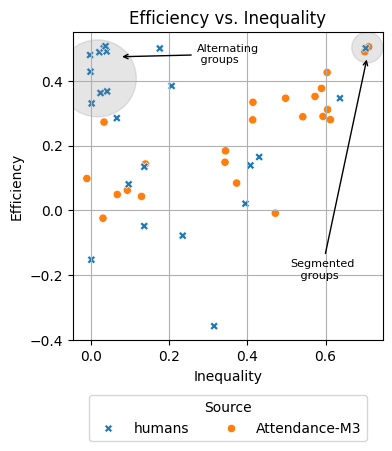

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from Utils.utils import GetMeasurements
from Utils.indices import AlternationIndex

fig, ax = plt.subplots(1, 1, figsize=(4,4))

# Calculate alternation index per group
gm = GetMeasurements(
    data=data,
    measures=['efficiency', 'normalized_efficiency', 'inequality']
)
df = gm.get_measurements()
alt_index = AlternationIndex.from_file(priority='sklearn')

# Scatter plot efficiency vs. inequality
df_jitter = df.copy()
n = df_jitter.shape[0]
df_jitter['inequality'] = df_jitter['inequality'] + np.random.normal(0,0.0075, n)
df_jitter['efficiency'] = df_jitter['efficiency'] + np.random.normal(0,0.0075, n)

sns.scatterplot(
    x='inequality', y='efficiency', 
    hue='model', style='model',
    data=df_jitter, ax=ax,
    hue_order=['humans', 'Attendance-M3']
)

# Show the alternating groups on the top-left corner
circle = patches.Circle(
    (0.08, 0.85), 0.125, 
    transform=ax.transAxes, 
    color='gray', alpha=0.2, 
)
ax.add_patch(circle)
# Add an arrow pointing to the cluster
ax.annotate(
    'Alternating\n groups',
    xy=(0.15, 0.92), xycoords='axes fraction',
    xytext=(0.4, 0.9), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=8
)

# Show the segmented groups on the top-right corner
circle = patches.Circle((0.95, 0.95), 0.05, transform=ax.transAxes, 
                        color='gray', alpha=0.2)
ax.add_patch(circle)
# Add an arrow pointing to the cluster
ax.annotate(
    'Segmented\n   groups',
    xy=(0.95, 0.92), xycoords='axes fraction',
    xytext=(0.7, 0.2), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=8
)
ax.set_xlabel('Inequality')
ax.set_ylabel('Efficiency')
ax.set_title('Efficiency vs. Inequality')
ax.legend(
    title='Source',
    loc='lower center', 
    bbox_to_anchor=(0.5, -.35),
    ncol=2
)
ax.grid()


In [70]:
fig.savefig(PATHS['bar_images'] / 'best_fit_vs_human.png', dpi=300, bbox_inches='tight')

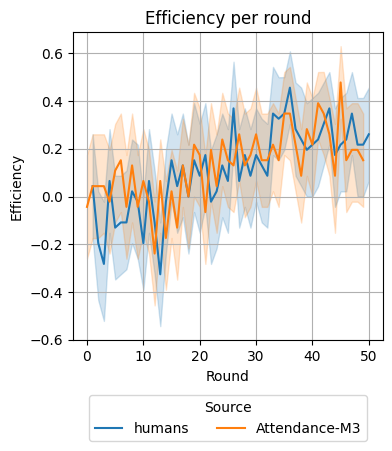

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

sns.lineplot(
    x='round', y='score', hue='model',
    data=data, ax=ax,
    hue_order=['humans', 'Attendance-M3']
)

ax.set_xlabel('Round')
ax.set_ylabel('Efficiency')
ax.set_title('Efficiency per round')
ax.legend(
    title='Source',
    loc='lower center', 
    bbox_to_anchor=(0.5, -.35),
    ncol=2
)
ax.grid()


In [68]:
fig.savefig(PATHS['bar_images'] / 'best_fit_vs_human_round.png', dpi=300, bbox_inches='tight')

In [ ]:
from Utils.interaction import Performer

LaTeX_string = Performer.sweep(
    agent_class=AttendanceM3,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='bias',
    values=[0, 0.2, 0.4, 0.6],
    image_folder=image_folder_M3,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

In [16]:
from Utils.interaction import Performer

LaTeX_string = Performer.sweep(
    agent_class=AttendanceM3,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='bias',
    values=[0, 0.2, 0.4, 0.6],
    image_folder=image_folder_M3,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

Running models for each bias:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Plotting efficiency...
Plot saved to ..\images\Attendance\M3\efficiency_bias.png
Plotting inequality...
Plot saved to ..\images\Attendance\M3\inequality_bias.png
Plotting entropy...
Plot saved to ..\images\Attendance\M3\entropy_bias.png
Plotting conditional_entropy...
Plot saved to ..\images\Attendance\M3\conditional_entropy_bias.png


---

In [17]:
from Utils.interaction import Performer

fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	"learning_rate": 0.2,
	"bias": 0.3,
	"inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':100,
	'num_rounds':1000,
	'verbose':False
}

list_dicts = [
    {
        'agent_class': AttendanceM1,
        'fixed_parameters': fixed_parameters,
        'free_parameters': free_parameters,
        'simulation_parameters': simulation_parameters,
        'seed': 7
    },
    {
        'agent_class': AttendanceM2,
        'fixed_parameters': fixed_parameters,
        'free_parameters': free_parameters,
        'simulation_parameters': simulation_parameters,
        'seed': 9
    },
    {
        'agent_class': AttendanceM3,
        'fixed_parameters': fixed_parameters,
        'free_parameters': free_parameters,
        'simulation_parameters': simulation_parameters,
        'seed': 0
    }
]

In [18]:
#-------------------------------
# Create plots
#-------------------------------
perf = Performer.simple_vs(
    list_dicts=list_dicts,
    image_folder=image_folder_all,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy'],
    kwargs={
        'T': 20,
        'model_names': {
            'Attendance-M1-7': 'M1',
            'Attendance-M2-9': 'M2',
            'Attendance-M3-0': 'M3'
        },
        'figsize': (3.5, 3)
    }
)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Plotting efficiency...
Plot saved to ..\images\Attendance\efficiency.png
Plotting inequality...
Plot saved to ..\images\Attendance\inequality.png
Plotting entropy...
Plot saved to ..\images\Attendance\entropy.png
Plotting conditional_entropy...
Plot saved to ..\images\Attendance\conditional_entropy.png


---

In [19]:
from Utils.interaction import Performer

fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	"learning_rate": 0.2,
	"bias": 0.3,
	"inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':1,
	'num_rounds':1000,
	'verbose':False
}

In [20]:
LaTeX_string = Performer.simple_run(
    agent_class=AttendanceM1,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    image_folder=image_folder_M1,
    measures=['render']
)

Seeds chosen for simple simulation: [12, 12, 40, 46]


Running seeds...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
LaTeX_string = Performer.simple_run(
    agent_class=AttendanceM2,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    image_folder=image_folder_M2,
    measures=['render']
)

Seeds chosen for simple simulation: [6, 32, 82, 84]


Running seeds...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
LaTeX_string = Performer.simple_run(
    agent_class=AttendanceM3,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    image_folder=image_folder_M3,
    measures=['render']
)

Seeds chosen for simple simulation: [49, 55, 73, 60]


Running seeds...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]